<img src="https://dsiag.ch/images/dsi_rgb.png" alt="dsi logo" width="100" style="position: absolute; right: 0px;"/>

# Neural Networks



In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Put grayscale values between 0 and 1

train_images = train_images / 255.0
test_images = test_images / 255.0

In [3]:
train_labels_one_hot = tf.one_hot(train_labels, len(class_names))
test_labels_one_hot = tf.one_hot(test_labels, len(class_names))

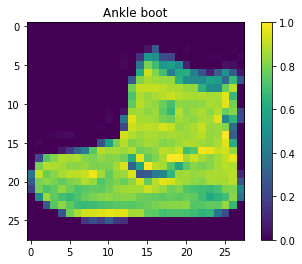

In [4]:
image_index = 0
label = class_names[train_labels[image_index]]

plt.figure()
plt.imshow(train_images[image_index])
plt.colorbar()
plt.grid(False)
plt.title(label)
plt.show()

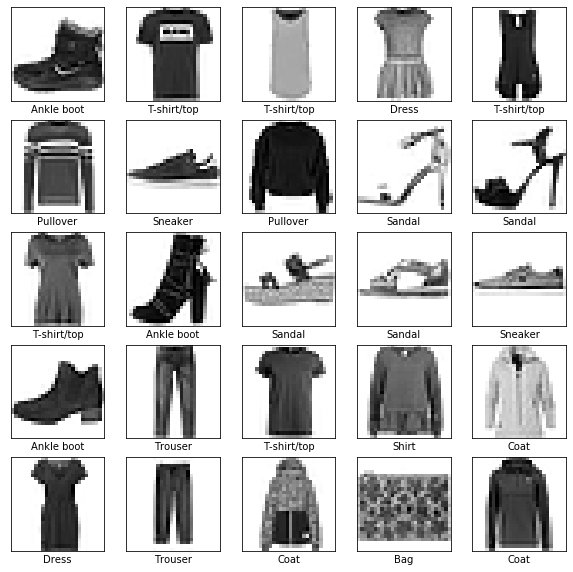

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Logistic Regression 

In [6]:
logRegModel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="Input2Vector"),
    tf.keras.layers.Dense(10, name="LinearLayer"),
    tf.keras.layers.Softmax(name="Softmax")
],name = 'LogisticRegression')

logRegModel.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
logRegModel.summary()

Model: "LogisticRegression"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input2Vector (Flatten)       (None, 784)               0         
_________________________________________________________________
LinearLayer (Dense)          (None, 10)                7850      
_________________________________________________________________
Softmax (Softmax)            (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [7]:
logRegModel.fit(train_images, train_labels_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 1.0837 - accuracy: 0.6563
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6082 - accuracy: 0.8010
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.5573 - accuracy: 0.8160
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5240 - accuracy: 0.8238
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5038 - accuracy: 0.8311
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4877 - accuracy: 0.8359
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.4793 - accuracy: 0.8384
Epoch 8/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4704 - accuracy: 0.8430
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4632 - accuracy: 0.8443
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step -

In [8]:
logRegModel.evaluate(test_images,  test_labels_one_hot, verbose=2)

313/313 - 2s - loss: 0.4864 - accuracy: 0.8335


[0.48643022775650024, 0.8335000276565552]

## Feed Forward Neural Network 

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="Input2Vector"),
    tf.keras.layers.Dense(128, activation='relu', name="Layer1"),
    tf.keras.layers.Dense(10, name="Layer2"),
    tf.keras.layers.Softmax(name="Softmax")
], name="FeedForwardNeuralNetwork")

model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "FeedForwardNeuralNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input2Vector (Flatten)       (None, 784)               0         
_________________________________________________________________
Layer1 (Dense)               (None, 128)               100480    
_________________________________________________________________
Layer2 (Dense)               (None, 10)                1290      
_________________________________________________________________
Softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(train_images, train_labels_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.9803 - accuracy: 0.6866
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.5286 - accuracy: 0.8193
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4692 - accuracy: 0.8374
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4478 - accuracy: 0.8444
Epoch 5/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4266 - accuracy: 0.8527
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4104 - accuracy: 0.8576
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4004 - accuracy: 0.8621
Epoch 8/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3901 - accuracy: 0.8645
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3800 - accuracy: 0.8667
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - 

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels_one_hot, verbose=2)

313/313 - 1s - loss: 0.4091 - accuracy: 0.8558


## Regularization

### L2 Weight regularization 

In [12]:
modelWithL2Normalization = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="Input2Vector"),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001), name="Layer1"),
    tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.l2(0.001),  name="Layer2"),
    tf.keras.layers.Softmax(name="Softmax")
], name="FeedForwardNNWithDropOut")

modelWithL2Normalization.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
modelWithL2Normalization.summary()

Model: "FeedForwardNNWithDropOut"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input2Vector (Flatten)       (None, 784)               0         
_________________________________________________________________
Layer1 (Dense)               (None, 128)               100480    
_________________________________________________________________
Layer2 (Dense)               (None, 10)                1290      
_________________________________________________________________
Softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [13]:
modelWithL2Normalization.fit(train_images, train_labels_one_hot, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.2560 - accuracy: 0.6837
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.7708 - accuracy: 0.8195
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.7131 - accuracy: 0.8351
Epoch 4/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6752 - accuracy: 0.8433
Epoch 5/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6510 - accuracy: 0.8476
Epoch 6/20
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6298 - accuracy: 0.8534
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6081 - accuracy: 0.8553
Epoch 8/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5991 - accuracy: 0.8576
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5872 - accuracy: 0.8599
Epoch 10/20
1875/1875 [==============================] - 11s 6ms/step - l

In [14]:
modelWithL2Normalization.evaluate(test_images,  test_labels_one_hot, verbose=2)

313/313 - 1s - loss: 0.5318 - accuracy: 0.8584


[0.5317956805229187, 0.8583999872207642]

### Dropout 

In [15]:
modelWithDropout = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name="Input2Vector"),
    tf.keras.layers.Dropout(0.5, name="DropoutInput"),
    tf.keras.layers.Dense(128, activation='relu', name="Layer1"),
    tf.keras.layers.Dropout(0.5, name="DropoutLayer1"),
    tf.keras.layers.Dense(10, name="Layer2"),
    tf.keras.layers.Softmax(name="Softmax")
], name="FeedForwardNNWithDropOut")

modelWithDropout.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
modelWithDropout.summary()

Model: "FeedForwardNNWithDropOut"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input2Vector (Flatten)       (None, 784)               0         
_________________________________________________________________
DropoutInput (Dropout)       (None, 784)               0         
_________________________________________________________________
Layer1 (Dense)               (None, 128)               100480    
_________________________________________________________________
DropoutLayer1 (Dropout)      (None, 128)               0         
_________________________________________________________________
Layer2 (Dense)               (None, 10)                1290      
_________________________________________________________________
Softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
____________________________________

In [16]:
modelWithDropout.fit(train_images, train_labels_one_hot, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4321 - accuracy: 0.4804
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.8305 - accuracy: 0.6959
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.7388 - accuracy: 0.7306
Epoch 4/20
1875/1875 [==============================] - 29s 15ms/step - loss: 0.6965 - accuracy: 0.7473
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.6752 - accuracy: 0.7553 0s - loss: 0.675
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6391 - accuracy: 0.7641
Epoch 7/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.6172 - accuracy: 0.7741
Epoch 8/20
1875/1875 [==============================] - 37s 20ms/step - loss: 0.6156 - accuracy: 0.7757
Epoch 9/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5997 - accuracy: 0.7816
Epoch 10/20
1875/1875 [==============================

In [17]:
modelWithDropout.evaluate(test_images,  test_labels_one_hot, verbose=2)

313/313 - 1s - loss: 0.4470 - accuracy: 0.8372


[0.4470120668411255, 0.8371999859809875]

## Convolutional Neural Network 

In [18]:
train_images_3d = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(28, 3, 
                           activation='relu',
                           input_shape=(train_images.shape[1], train_images.shape[2], 1),
                           name="ConvolutionLayer1"),
    tf.keras.layers.MaxPooling2D((2, 2), name="PoolingLayer"),
    tf.keras.layers.Conv2D(56, 3, activation='relu', name="ConvolutionLayer2"),
    tf.keras.layers.Flatten(name="FlattenToVector"),
    tf.keras.layers.Dense(56, activation='relu', name="NNLayer"),
    tf.keras.layers.Dense(10, name="OutputLayer"),
    tf.keras.layers.Softmax()
],name = 'ConvolutionalNetwork')

In [19]:
cnn_model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
cnn_model.summary()

Model: "ConvolutionalNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ConvolutionLayer1 (Conv2D)   (None, 26, 26, 28)        280       
_________________________________________________________________
PoolingLayer (MaxPooling2D)  (None, 13, 13, 28)        0         
_________________________________________________________________
ConvolutionLayer2 (Conv2D)   (None, 11, 11, 56)        14168     
_________________________________________________________________
FlattenToVector (Flatten)    (None, 6776)              0         
_________________________________________________________________
NNLayer (Dense)              (None, 56)                379512    
_________________________________________________________________
OutputLayer (Dense)          (None, 10)                570       
_________________________________________________________________
softmax (Softmax)            (None, 10)       

In [20]:
cnn_model.fit(train_images_3d, train_labels_one_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 52s 27ms/step - loss: 1.0591 - accuracy: 0.6313
Epoch 2/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.5004 - accuracy: 0.8171
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.4258 - accuracy: 0.8489
Epoch 4/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.3795 - accuracy: 0.8637
Epoch 5/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.3452 - accuracy: 0.8757
Epoch 6/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.3284 - accuracy: 0.8816
Epoch 7/10
1875/1875 [==============================] - 64s 34ms/step - loss: 0.3100 - accuracy: 0.8889
Epoch 8/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.2898 - accuracy: 0.8950
Epoch 9/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2801 - accuracy: 0.8993
Epoch 10/10
1875/1875 [==============================] - 50s 27m

In [21]:
test_images_3d = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
cnn_model.evaluate(test_images_3d,  test_labels_one_hot, verbose=2)

313/313 - 3s - loss: 0.3343 - accuracy: 0.8832


[0.3343276381492615, 0.8831999897956848]